# Introduction 🙉


The present project is a copy of Retail Sales Analysis and Rating Prediction by Brian Risk. Find it: https://www.kaggle.com/code/devraai/retail-sales-analysis-and-rating-prediction/notebook

The aim of the study project includes explore interesting trends and relationships. Also build a predictor model for customer rating.

I will try comment all the process to focus on learning process, it includes the conclusion part, i will try conclude this project with my own words.

**Table of contents**

1. [Libraries importing](#import)
1. [Data Loading](#load)
1. [Data cleaning and preprocessing](#cleaning)
1. [Exploratory Data Analysis](#EDA)
1. [Predictor Model](#model)
1. [Conclusion](#conclusion)

## 📖 Libraries importing <a id='import'></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

sns.set(style='whitegrid')


## 💾 Data Loading <a id='load'></a>

In [3]:
df = pd.read_csv(r'D:\Data analyst\datasets_kaggle\13-10-25\retail_sales_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       500 non-null    object 
 1   OrderDate     500 non-null    object 
 2   Branch        500 non-null    object 
 3   City          500 non-null    object 
 4   CustomerType  500 non-null    object 
 5   Gender        500 non-null    object 
 6   ProductLine   500 non-null    object 
 7   UnitPrice     500 non-null    float64
 8   Quantity      500 non-null    int64  
 9   Payment       500 non-null    object 
 10  Total         500 non-null    float64
 11  COGS          500 non-null    float64
 12  GrossIncome   500 non-null    float64
 13  GrossMargin%  500 non-null    float64
 14  Rating        500 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 58.7+ KB


## 🧹 Data Cleaning and preprocessing <a id='cleaning'></a>

**Columns and data types**

In [4]:
df.columns

Index(['OrderID', 'OrderDate', 'Branch', 'City', 'CustomerType', 'Gender',
       'ProductLine', 'UnitPrice', 'Quantity', 'Payment', 'Total', 'COGS',
       'GrossIncome', 'GrossMargin%', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['orderid', 'orderdate', 'branch', 'city', 'customertype', 'gender',
       'productline', 'unitprice', 'quantity', 'payment', 'total', 'cogs',
       'grossincome', 'grossmargin%', 'rating'],
      dtype='object')

In [6]:
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderid       500 non-null    object        
 1   orderdate     500 non-null    datetime64[ns]
 2   branch        500 non-null    object        
 3   city          500 non-null    object        
 4   customertype  500 non-null    object        
 5   gender        500 non-null    object        
 6   productline   500 non-null    object        
 7   unitprice     500 non-null    float64       
 8   quantity      500 non-null    int64         
 9   payment       500 non-null    object        
 10  total         500 non-null    float64       
 11  cogs          500 non-null    float64       
 12  grossincome   500 non-null    float64       
 13  grossmargin%  500 non-null    float64       
 14  rating        500 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(

**Missing values**

In [7]:
missing_values = df.isna().sum()
missing_values

orderid         0
orderdate       0
branch          0
city            0
customertype    0
gender          0
productline     0
unitprice       0
quantity        0
payment         0
total           0
cogs            0
grossincome     0
grossmargin%    0
rating          0
dtype: int64

## 🔍 Exploratory Data Analysis <a id='EDA'></a>

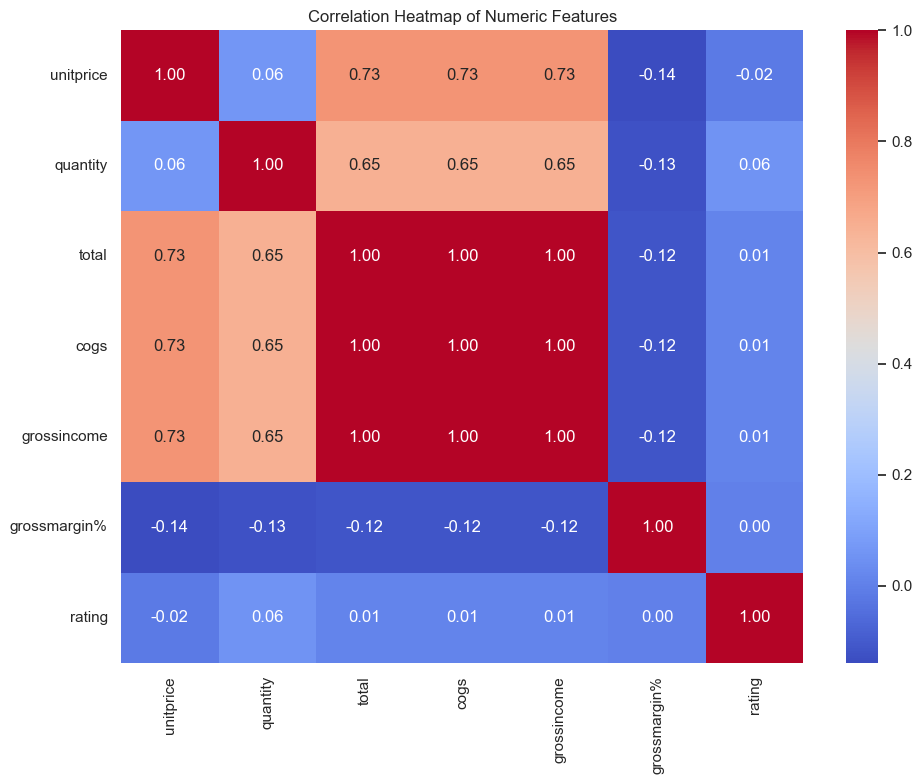

In [8]:
#Extract only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt ='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap')    

**Comment of heatmap**

Strong correlations ($r \approx 1.00$)

Total, COGS and Gross income have strong relationship. It could be because Total and Gross income are calculated by COGS.

Positive correlations ($ 65 <= r <1.00$ )

The unit price has positive relationship with total income, it could be because the greater quantity sold, the greater income. Besides, If the COGS is lower, the gross income is higher.

Weak or weak negative correlations ($ -0.50 < r < 0.50)

Gross Margin and rating are unrelated to any other characteristic, their r is very close to 0. They can be called independent.

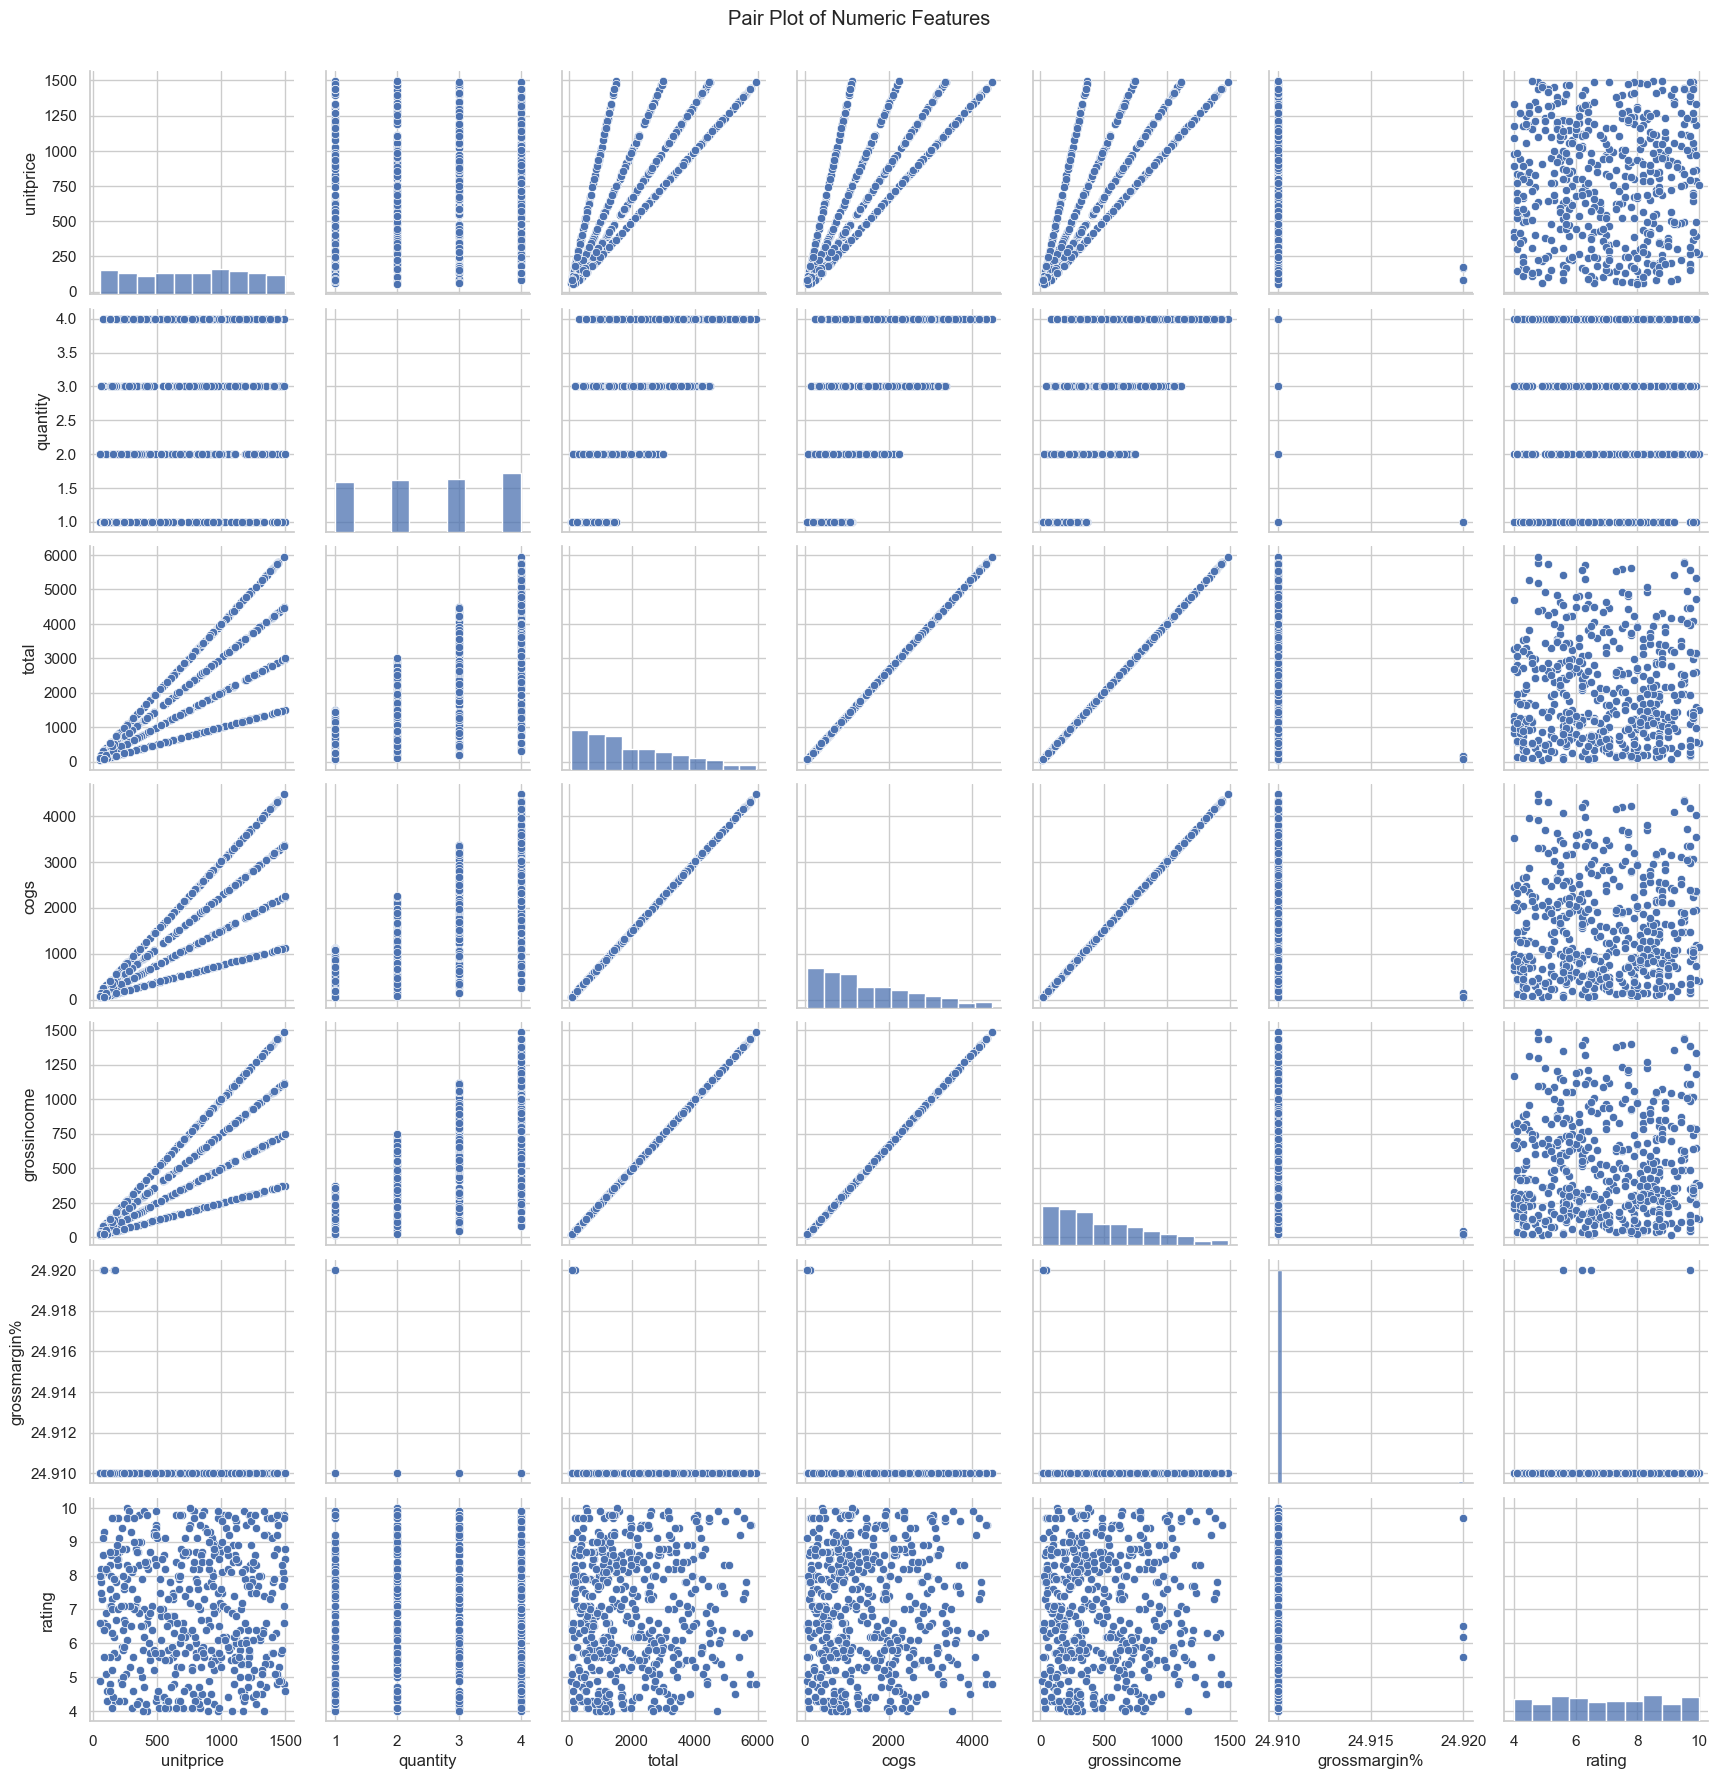

In [10]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

**Comment of the graph**

The graph appears to have multicollinearity in total, COGS and grossincome.

Gross margin % seems to be useless variable to predict the rating.

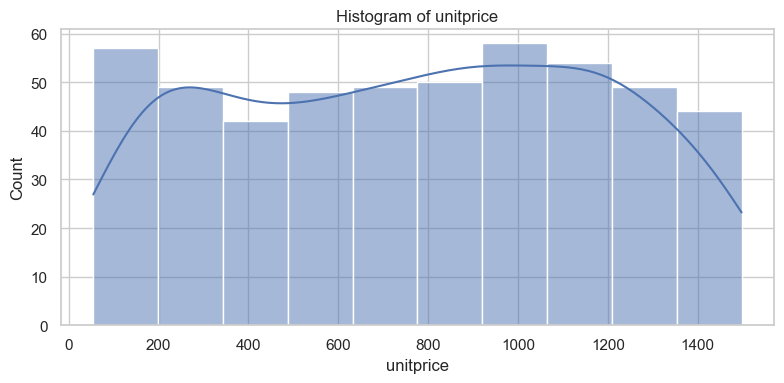

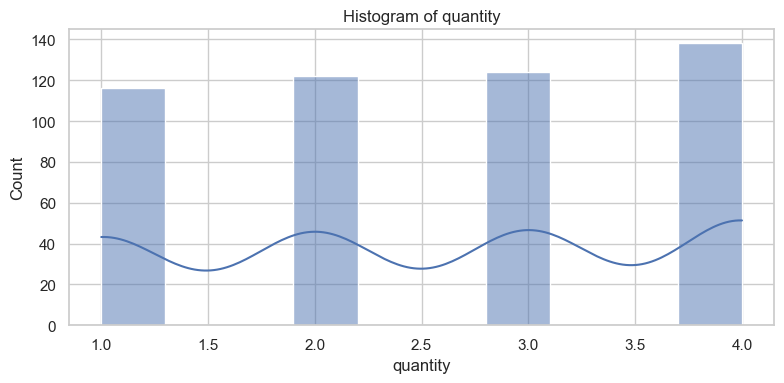

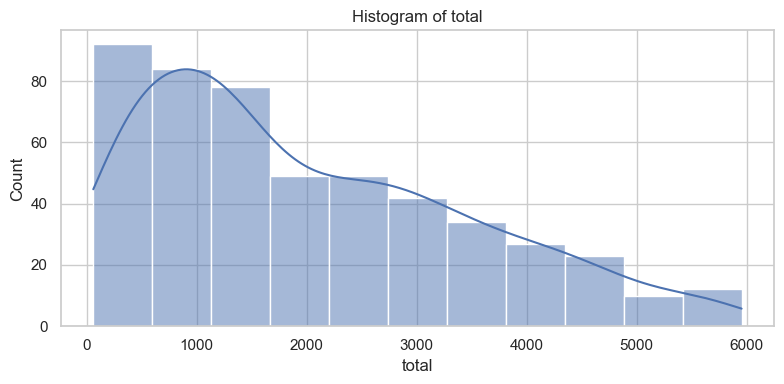

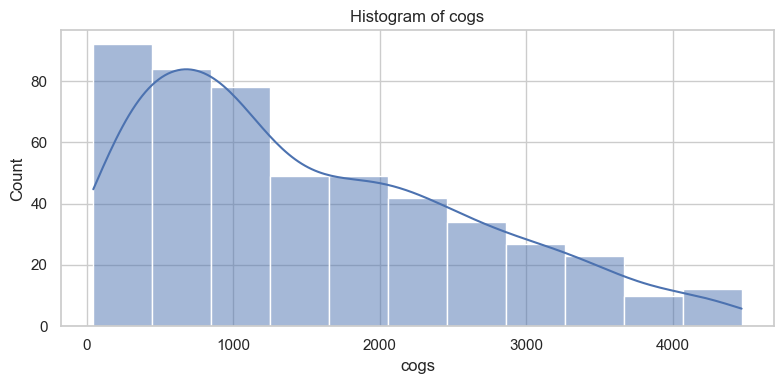

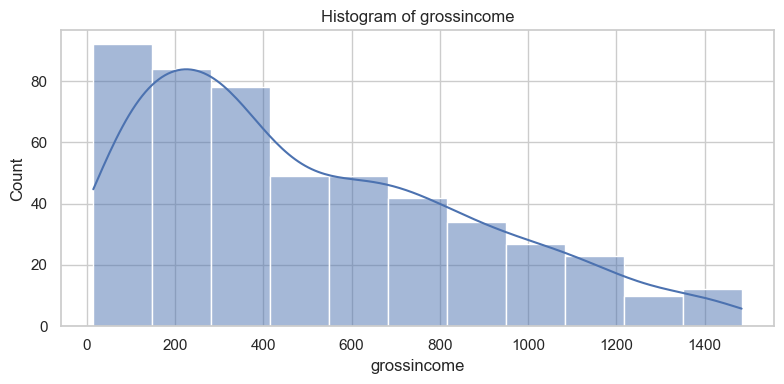

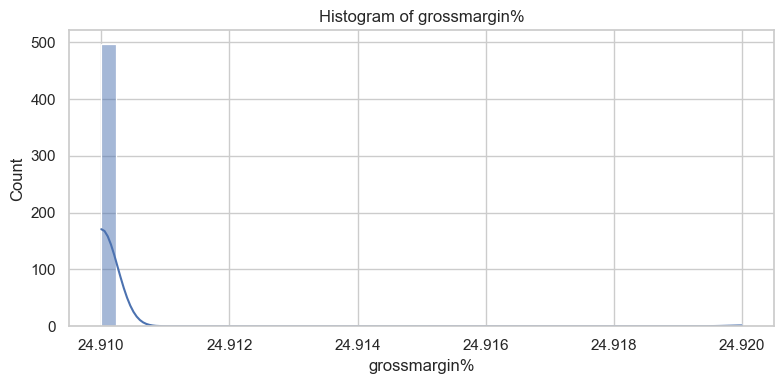

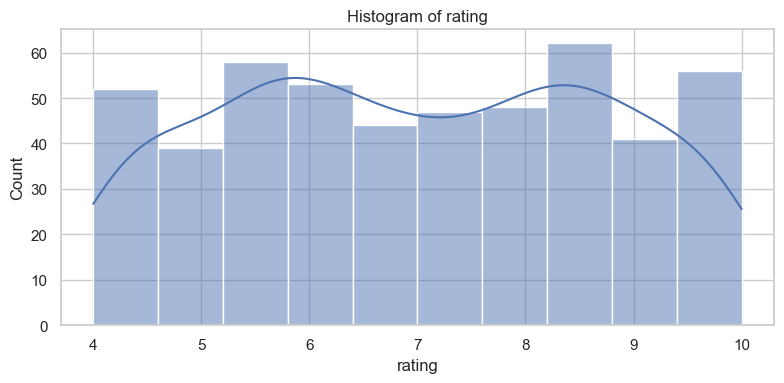

In [11]:
numeric_columns = numeric_df.columns
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

**Comment of the graph**

- Unit price: There seems to be a tendency for prices to go to extremes, low or high. It has a multimodal distribution, with several peaks.
- Quantity: Customers have an equal probability of purchasing 1, 2, 3 and 4 units in a single transaction.
- Total:
- COGS:
- Gross income:
- Gross margin %:
- Rating:

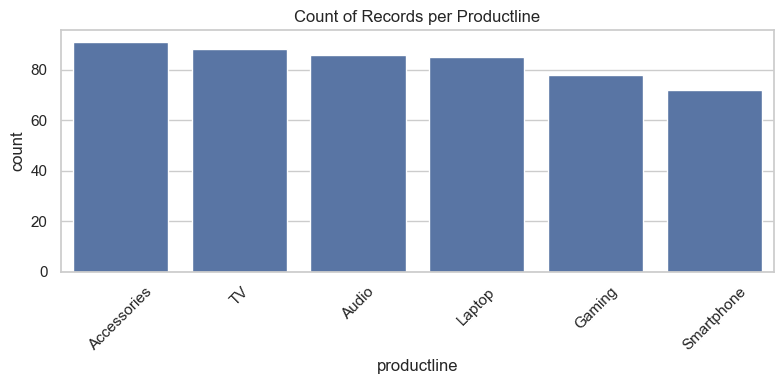

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='productline', order=df['productline'].value_counts().index)
plt.title('Count of Records per Productline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

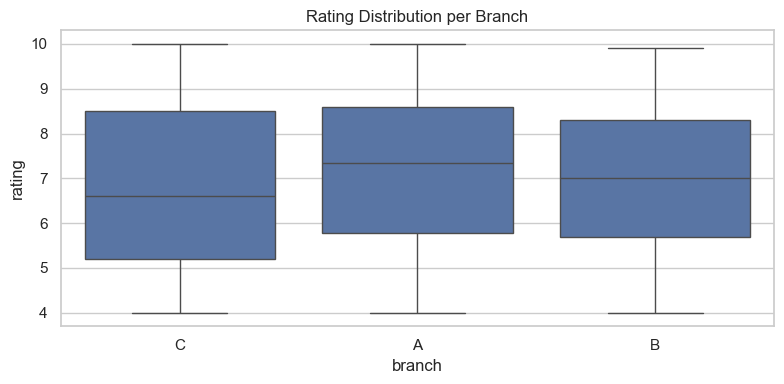

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x='branch', y='rating', data=df)
plt.title('Rating Distribution per Branch')
plt.tight_layout()
plt.show()

## 📊 Predictor Model <a id='model'></a>

Linear Regression model R² score: -0.0755


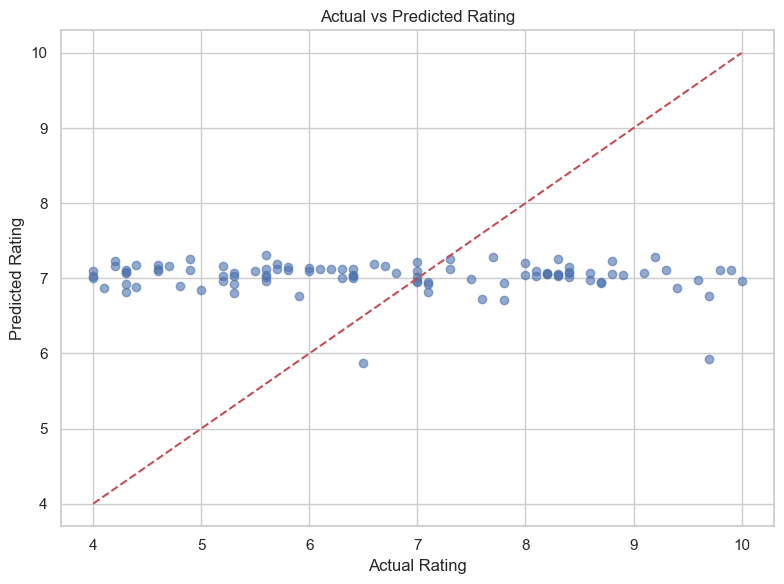

In [14]:
feature_cols = ['unitprice', 'quantity','total','cogs','grossincome','grossmargin%']

for col in feature_cols:
    if col not in df.columns:
        raise ValueError(f'Expected column {col} not found in the dataset.')

X = df[feature_cols].copy()
y = df['rating'].copy()

data = pd.concat([X,y], axis=1).dropna()
X = data[feature_cols]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'Linear Regression model R² score: {r2:.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

## 💭 Conclusion <a id='conclusion'></a>